# Introduction (lecture et visualisation d'images)

Chargement des librairies

In [333]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

Lecture d'une image tif en niveaux de gris

In [334]:
im = np.double(plt.imread("artifice.tiff"))

Affichage des dimensions de l'image

In [335]:
[nrow,ncol]=im.shape
print(nrow,ncol)

773 700


Affichage de l'image à l'aide de la commande `plt.imshow` 

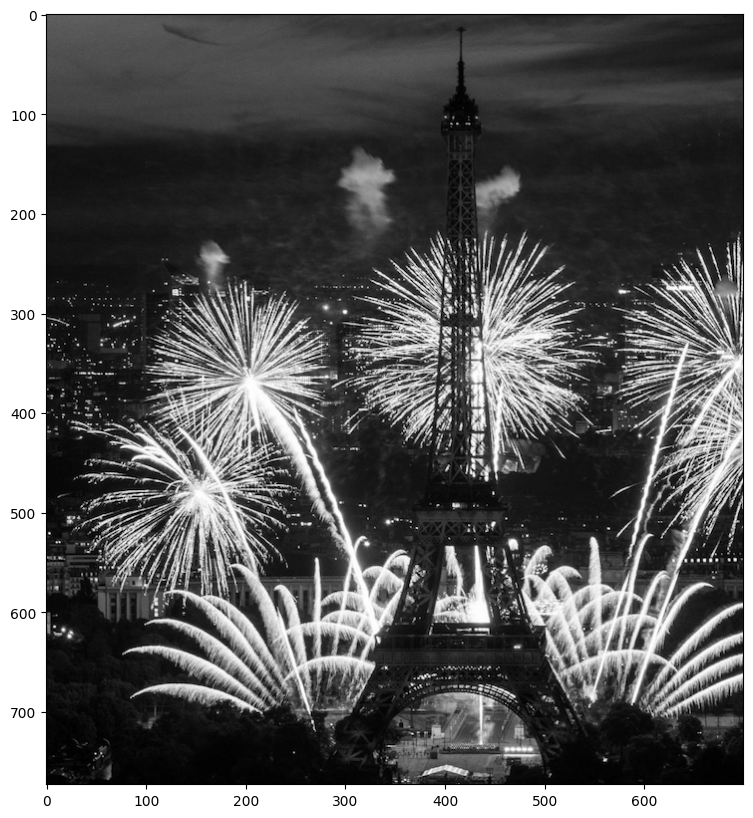

In [336]:
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')

# Exercice 1: convolution bi-dimensionnelle (construction de A)

Étant donnés une image $u : \Omega \to \mathbb{R}$ et un noyau
$h: \{-m_x\, \dots , m_x\} \times \{-m_y , \dots,m_y\} \to \mathbb{R}$ de taille
$2m_x+1 \times 2 m_y +1$, on note $Au$ (ou $u * h$) la convolution entre l'image
$u$ et le noyau $h$ défnie par

$$Au(k,\ell) = (u * h)(k,\ell) := \sum_{\substack{-m_x \leq a \leq m_x \\ -m_y \leq b \leq m_y}} h(a,b)  \, u(k-a,\ell-b) \,.$$

**Attention**: dans la somme ci-dessous, on doit prendre soin de, (i) soit
donner un sens à $u(k-a,\ell-b)$ quand $(k-a,\ell-b) \not \in \Omega$ (par
exemple en prolongeant $u$ par $0$ en dehors de $\Omega$, ou bien en prolongeant
$u$ de manière périodique), (ii) soit interdire le calcul de $Au(k,\ell)$ pour
les positions $(k,\ell)$ impliquant une évaluation de $u$ en dehors de $\Omega$
(au quel cas l'image $Au$ est plus petite que l'image $u$).

1-a) Écrire une fonction `convol2D` qui calcule la convolution entre une image $u$ et un noyau $h$ en adoptant la convention "<em>$u$ est nulle en dehors de $\Omega$"</em>.

In [337]:
def convol2D(u,h):
    
    h = np.atleast_2d(h)
    mx , my = (h.shape[0] - 1)//2 , (h.shape[1] - 1)//2
    nx , ny = u.shape[0] , u.shape[1] 
    A = np.zeros((nx-2*mx,ny-2*my))
    h_flip = np.flipud(np.fliplr(h))

    for k in range(A.shape[0]):
        for l in range(A.shape[1]):
            patch = u[k:k+2*mx+1,l:l+2*my+1]
            A[k,l] = np.sum(patch * h_flip)
    return A

In [338]:
h1 = np.array([1,-1,0])
h2 = np.array([[-1],[1],[0]])
h3 = np.array([[0,1,0],
               [1,-4,1],
               [0,1,0]])
h4 = np.ones((11,11))

In [339]:
convol_h1 = convol2D(im,h1)
convol_h2 = convol2D(im,h2)
convol_h3 = convol2D(im,h3)
convol_h4 = convol2D(im,5*h4)

1-b) À l'aide de votre fonction `convol2D`, afficher et commenter le résultat de la convolution entre l'image `artifice.tiff` et chacun des filtres ci-dessous

$$
%
h_1 = \left(\begin{array}{ccc}
1 & -1 & 0
\end{array}\right)\,,\quad
%
h_2 = \left(\begin{array}{c}
-1 \\ 1 \\ 0
\end{array}\right)\,,\quad
%
h_3 = \left(\begin{array}{ccc}
      0 & 1 & 0 \\
      1 & -4 & 1 \\
      0 & 1 & 0
\end{array}\right)\,,\quad
%
h_4 =  \left(\begin{array}{ccc}
      1 & \cdots & 1 \\
      \vdots &  & \vdots \\
      1 & \cdots & 1
\end{array}\right)\,\in \mathcal{M}_{11,11}(\mathbb{R}).
$$


1-c) **Optionnel (sauf pour le compte rendu de TP)**
Utiliser la fonction `convolve2d` du module `scipy.signal` pour reproduire les résultats de la question b). S'aider de la documentation pour comprendre comment est définie la condition aux bords (options `mode`, `boundary` et `fillvalue`) https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html.
Observe-t-on une différence avec notre fonction `convol2d` ?

1-d) **Optionnel (sauf pour le compte rendu de TP)** Quelle condition aux bords le calcul de convolution correspondant à l'appel v = sg.convolve2d(im,h,mode='valid') utilise-t-il ? Illustrer par un exemple jouet.

1-e) **Optionnel (sauf pour le compte rendu de TP)** À quoi correspond l'appel out = sg.convolve2d(v,hsym,mode='full',fillvalue=0) lorsque  hsym = h[::-1,::-1]? Illustrer à nouveau.

In [340]:
## A COMPLETER 

# Exercice 2 : Modèles de dégradation d’images (construction de y)

## 1. Flou, défocus, flou de bougé

Un phénomène de flou est généralement modélisé par une convolution entre l'image
et un noyau de flou. Les instructions ci-dessous permettent de charger et d'afficher des noyaux associés à des flous de différentes natures que l'on rencontre fréquemment en restauration d'images.

Text(0.5, 1.0, 'flou de defocus')

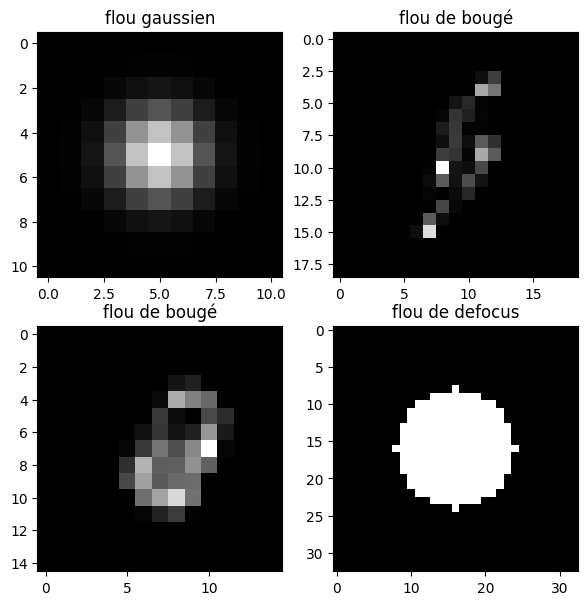

In [341]:
h_gaussian = np.load('gaussian_kernel.npy')
h_motion1 = np.load('motion_kernel1.npy')
h_motion2 = np.load('motion_kernel2.npy')
h_defocus = np.load('defocus_kernel.npy')

fig = plt.figure(figsize=(7,7))
# affichage du noyau de flou gaussien
fig.add_subplot(2,2,1)
plt.imshow(h_gaussian,cmap='gray',interpolation='none')
plt.title('flou gaussien')
# affichage du noyau de flou de bougé n.1
fig.add_subplot(2,2,2)
plt.imshow(h_motion1,cmap='gray',interpolation='none')
plt.title('flou de bougé')
# affichage du noyau de flou de bougé n.1
fig.add_subplot(2,2,3)
plt.imshow(h_motion2,cmap='gray',interpolation='none')
plt.title('flou de bougé')
# affichage du noyau de flou de bougé n.1
fig.add_subplot(2,2,4)
plt.imshow(h_defocus,cmap='gray',interpolation='none')
plt.title('flou de defocus')

2-a) Visualiser les images $y = Ax + \varepsilon$ où $x$ est l'image `artifice.tiff` dégradée par ces différents types de flous ainsi que par l’ajout d’un bruit gaussien $\varepsilon$ de moyenne nulle et de variance $\sigma^2$.

In [342]:
def bruitage(image,sigma = 1):
    nx , ny = image.shape[0] , image.shape[1] 
    eps = np.random.normal(loc = 0, scale = sigma, size = (nx , ny))
    return eps

In [343]:
A = convol2D(im,h_gaussian)
image_bruitee = bruitage(A,sigma=1) + A

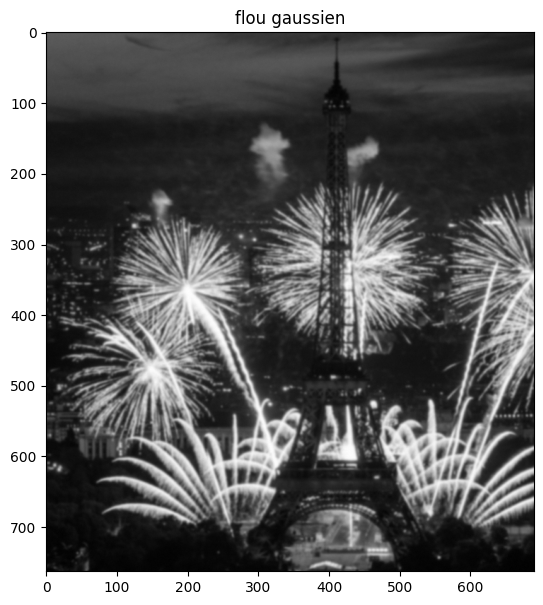

In [344]:
fig = plt.figure(figsize=(7,7))
plt.imshow(h_gaussian,cmap='gray',interpolation='none')
plt.title('flou gaussien')
plt.imshow(image_bruitee,cmap='gray')
plt.show()

## 2. Inpainting spatial

L'inpainting consiste à reconstruire les parties manquantes d'une image. Dans ce cas, le problème consiste à inverser un opérateur de masquage des pixels. Étant donnée une image $u : \Omega \to \mathbb{R}$ et un sous domaine $\omega \subset \Omega$, on pose

$$
\forall (k,\ell) \in \Omega \,,\quad Au(k,\ell) = \left\{\begin{array}{cl}
u(k,\ell) & \text{si} (k,\ell) \in \omega \\
0 & \text{sinon}
\end{array}\right.
$$


2-b) Impémenter un tel opérateur et l'appliquer à l'image `artifice.tiff` en masquant 70% des pixels aléatoirements, puis un rectangle de l'image. 

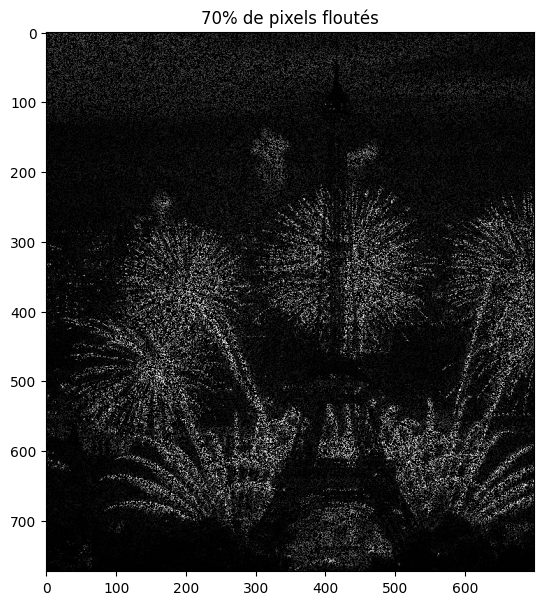

In [345]:
def masquaque(image):
    imagecop = np.copy(image)
    nx , ny = image.shape
    rd = np.random.random(size = (nx,ny)) 
    mask = rd >= 0.3
    imagecop[mask] = 0
    return imagecop

masque = masquaque(im)
fig = plt.figure(figsize=(7,7))
plt.imshow(masque,cmap='gray')
plt.title("70% de pixels floutés")
plt.show()

# Exercice 3 : déflouage par inversion directe (reconstruction de x)

Une autre manière de gérer les bords de l'image dans la formule de convolution
discrète consiste à prolonger l'image $u$ de manière périodique en dehors de son
domaine. On peut montrer dans ce cas qu'une convolution dans le domaine spatial
équivaut à une multiplication dans le domaine de Fourier. Autrement dit, pour
tout noyau $h$, il existe un unique noyau $H$ tel que

$$\mathrm{DFT}(u*h) = \mathrm{DFT}{(u)} \cdot H\,,$$

où $\mathrm{DFT}$ désigne l'opérateur de transformée de Fourier discrète en
dimension 2. L'opération de convolution ainsi obtenue est appelée
<em>convolution circulaire</em>.


3-a) Le fichier `fourier_gaussian_kernel.npy` contient le filtre
  fréquentiel `H_gaussian` correspondant à un noyau gaussien $h$ dans le
  domaine spatial. Calculer la convolution circulaire entre l'image $u$ et le noyau $h$.

Text(0.5, 1.0, 'image floue')

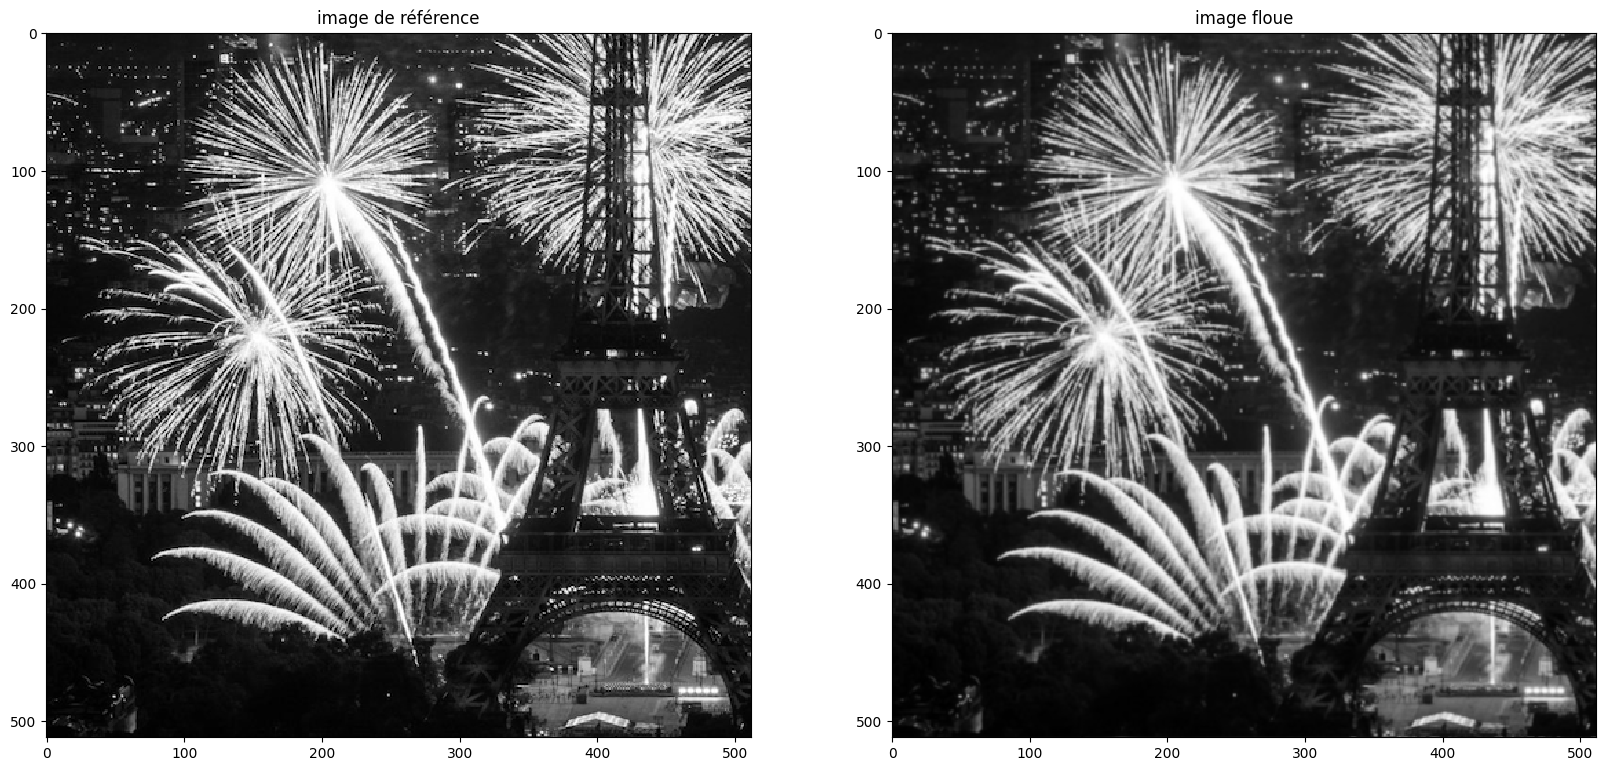

In [346]:
# chargement du noyau et de l'image de référence
H_gaussian = np.load('fourier_gaussian_kernel.npy')
ref = np.double(plt.imread('artifice.tiff'));
ref=ref[-513:-1,0:512]

# calcul de la convolution circulaire
dft_u = np.fft.fft2(ref)
convol_circ = dft_u * H_gaussian
Au = np.real(np.fft.ifft2(convol_circ))

# affichage de l'image nette et de l'image floue
fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,2,1)
plt.imshow(ref,cmap='gray',interpolation='none')
plt.title('image de référence')

fig.add_subplot(1,2,2)
plt.imshow(Au,cmap='gray',interpolation='none')
plt.title('image floue')


3-b) Peut-on inverser cette opération?

In [347]:
def inverse_process(image):
    convol_circ_2 = np.fft.fft2(image)
    ref2 = np.real(np.fft.ifft2(convol_circ_2 / H_gaussian))
    return ref2

3-c) Ajouter un bruit gaussien de variance $\sigma^2 = 10$ à l’image floue et effectuer l’inversion. Commenter le résultat ainsi obtenu.

In [348]:
eps = bruitage(Au,sigma=np.sqrt(10))
ref_bruite = ref + eps
Au_bruitee = Au + eps
ref2 = inverse_process(Au_bruitee)

Text(0.5, 1.0, 'processus inverse apres bruitage')

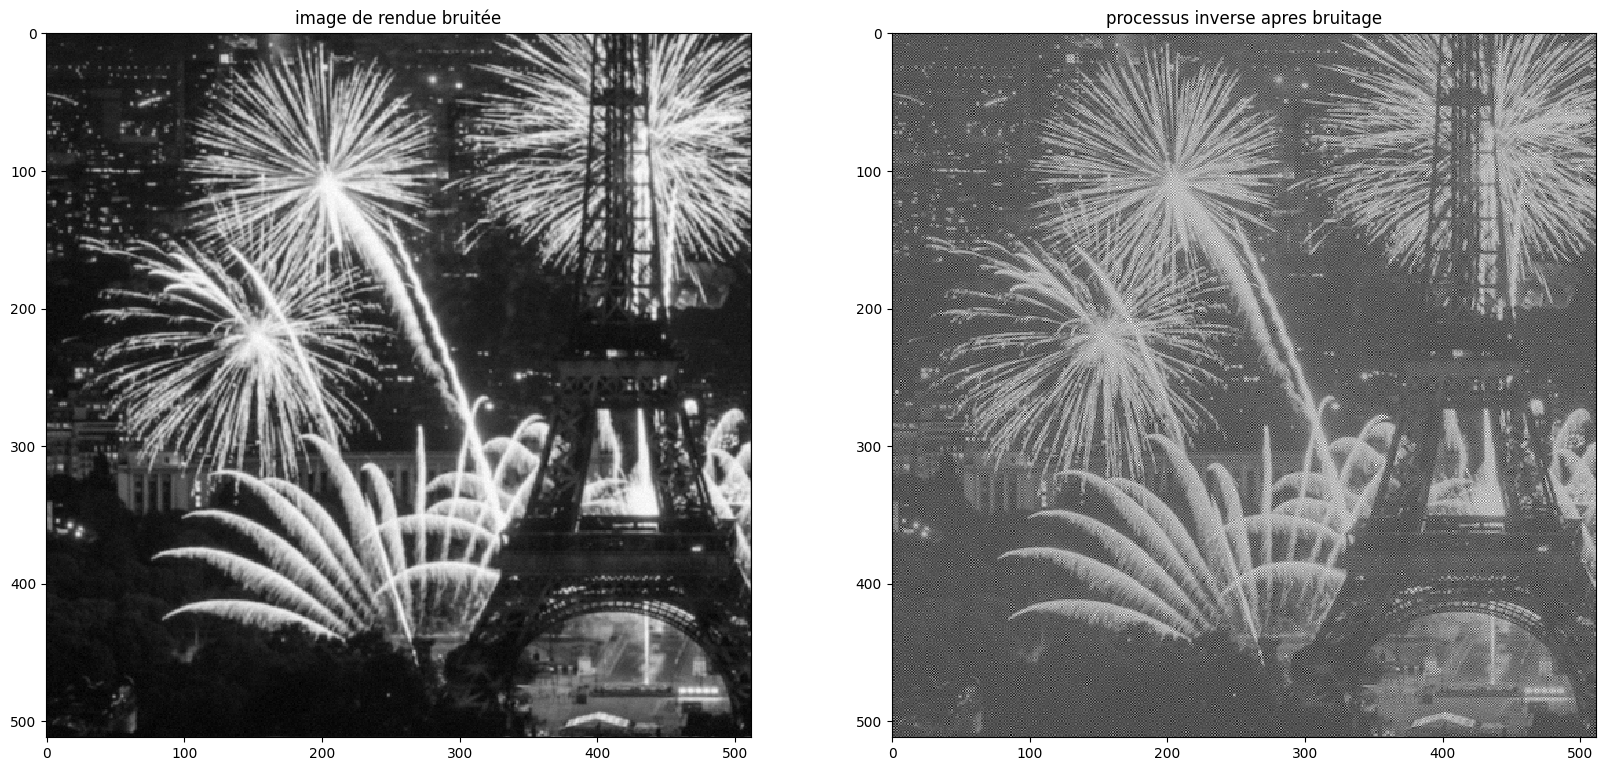

In [349]:
# affichage de l'image nette et de l'image floue
fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,2,1)
plt.imshow(Au_bruitee,cmap='gray',interpolation='none')
plt.title('image de rendue bruitée')

fig.add_subplot(1,2,2)
plt.imshow(ref2,cmap='gray',interpolation='none')
plt.title('processus inverse apres bruitage')